<a href="https://colab.research.google.com/github/aisynahdah20/Covid-19_classification_vgg16/blob/main/Pre_trained_800_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"ATTACH THE SOURCE OF DATASET"
#Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


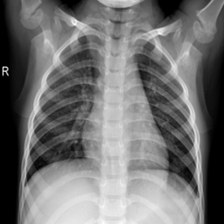

'Sampel Citra Thoraks Normal'

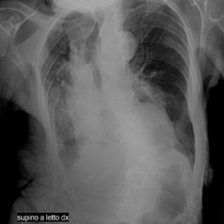

'Sampel Citra Thoraks COVID-19'

In [ ]:
"DISPLAY THE IMAGES"

#import the required libraries
import os
import random
from IPython.display import Image

#decide the directory address from image dataset folder
path = '/content/drive/MyDrive/RADIG800/TRAIN'

normal_dir = os.path.join(path,'NORMAL')
covid_dir = os.path.join (path,'COVID')

#get the full list of all image dataset from the folder path
file_normal = os.listdir(normal_dir)
file_covid = os.listdir(covid_dir)

#choose sample image randomly from both folders
random_file_normal = random.choice(file_normal)
random_file_covid = random.choice(file_covid)

#display the sample image
display (Image(os.path.join(normal_dir, random_file_normal)),"Sampel Citra Thoraks Normal",
         Image(os.path.join(covid_dir,random_file_covid)),"Sampel Citra Thoraks COVID-19")





Total training data : 640
Total validation data : 80
Total validation data : 80
Found 640 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
training classes: {'COVID': 0, 'NORMAL': 1}
validation classes: {'COVID': 0, 'NORMAL': 1}
test classes: {'COVID': 0, 'NORMAL': 1}
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                          

3/3 [==============================] - 1s 149ms/step
Classification Report:
               precision    recall  f1-score   support

       COVID       1.00      0.88      0.93        40
      NORMAL       0.89      1.00      0.94        40

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80

Confusion Matrix:
 [[35  5]
 [ 0 40]]


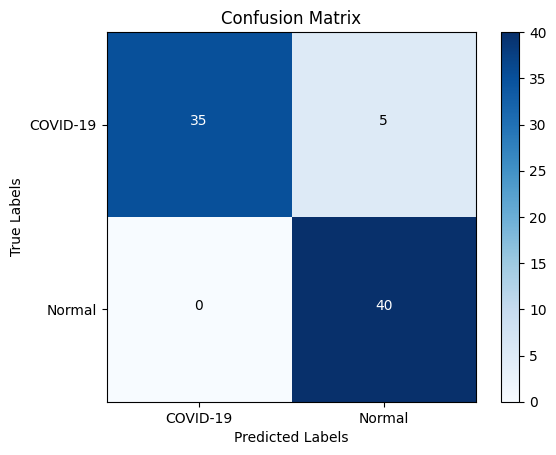

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


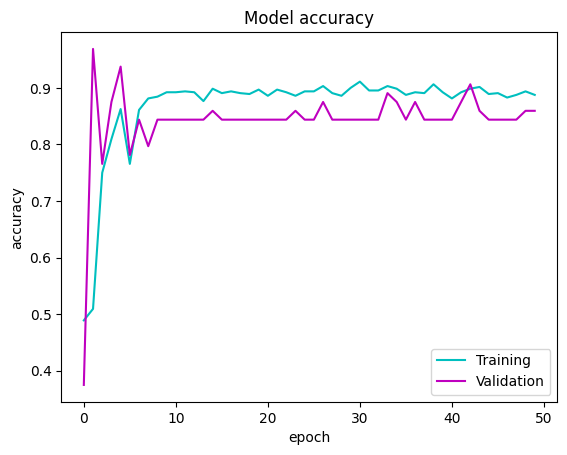

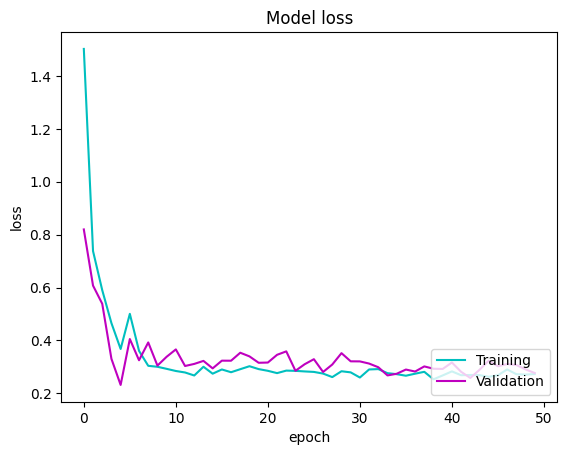

In [ ]:
#import the required libraries
import os
import tensorflow
import random
import numpy as np
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from random import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Setting the batch size' value
lr = 0.001
bs = 32
opt = Adam (learning_rate = lr)


#Set the dataset directories
#training directories
train_dir = "/content/drive/MyDrive/RADIG800/TRAIN"
train_normal_dir = "/content/drive/MyDrive/RADIG800/TRAIN/NORMAL"
train_covid_dir = "/content/drive/MyDrive/RADIG800/TRAIN/COVID"

#validation directories
valid_dir = "/content/drive/MyDrive/RADIG800/VALIDATION"
valid_normal_dir = "/content/drive/MyDrive/RADIG800/VALIDATION/NORMAL"
valid_covid_dir = "/content/drive/MyDrive/RADIG800/VALIDATION/COVID"

#testing directories
test_dir = "/content/drive/MyDrive/RADIG800/TEST"
test_normal_dir = "/content/drive/MyDrive/RADIG800/TEST/NORMAL"
test_covid_dir = "/content/drive/MyDrive/RADIG800/TEST/COVID"

#get the full list number of all images
#train
num_normal_train = len(os.listdir(train_normal_dir))
num_covid_train = len(os.listdir(train_covid_dir))

#validation
num_normal_valid =len(os.listdir(valid_normal_dir))
num_covid_valid =len(os.listdir(valid_covid_dir))

#testing
num_normal_test = len(os.listdir(test_normal_dir))
num_covid_test = len(os.listdir(test_covid_dir))

#set the total number of training and validation image
total_train = num_normal_train+num_covid_train
total_val = num_normal_valid+num_covid_valid
total_test = num_normal_test+num_covid_test

print("Total training data :", total_train)
print("Total validation data :", total_val)
print("Total validation data :", total_test)

#Define the data generator for training, validation, testing
#Training with augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 15,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True)

train_generator = train_datagen.flow_from_directory (train_dir,
                                                     batch_size = bs,
                                                     class_mode = 'categorical',
                                                     shuffle=False)

#Validation
val_datagen = ImageDataGenerator(rescale=1./255.)
val_generator = val_datagen.flow_from_directory (valid_dir,
                                                 batch_size = bs,
                                                 class_mode = 'categorical',
                                                 shuffle=False)

#testing
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory (test_dir,
                                                  batch_size = bs,
                                                  class_mode = 'categorical',
                                                  shuffle=False)

print('training classes:', train_generator.class_indices)
print('validation classes:', val_generator.class_indices)
print('test classes:', test_generator.class_indices)

"BUILD MODEL ARCHITECTURE"
# Load pre-trained VGG16 model without top layers
base_model = VGG16(weights="imagenet",include_top = False,input_shape=(224,224,3))

#Freeze the pre-trained layers
for layer in base_model.layers:
  layer.trainable = False

#Add modified fully connected layers on top
last_layer = base_model.get_layer('block5_pool')
last_output = last_layer.output
headmodel = tensorflow.keras.layers.GlobalAveragePooling2D()(last_output)
headmodel = tensorflow.keras.layers.Dense(512, activation='relu')(headmodel)
headmodel = tensorflow.keras.layers.Dropout(0.5)(headmodel)
headmodel = tensorflow.keras.layers.Dense(512, activation='relu')(headmodel)
headmodel = tensorflow.keras.layers.Dropout(0.5)(headmodel)
headmodel = tensorflow.keras.layers.Dense(2, activation='softmax')(headmodel)

#Create the final model
model = tensorflow.keras.Model(base_model.input, headmodel)

#Compile the model
model.compile(loss = "categorical_crossentropy", optimizer= opt, metrics =["accuracy"])
model.summary()

#Add early stopping to monitor validation accuracy
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau (monitor = "val_accuracy",
                               factor = 0.3,
                               patience = 5,
                               min_lr = 0.0001,
                               verbose = 1)
callbacks =[reduce_lr]
#Train the model
history = model.fit(train_generator,
                    epochs = 50,
                    steps_per_epoch = total_train//bs,
                    validation_data = val_generator,
                    validation_steps = total_val//bs,
                    callbacks = callbacks)

#Evaluate the model
scores = model.evaluate(test_generator,batch_size=bs)
print("Accuracy: %.2f%%" % (scores[1]*100))


#Generate predictions on the testing dataset
predict = model.predict(test_generator)
y_pred = np.argmax(predict, axis=1)
y_true = test_generator.classes

#Generate the classification report
cr =classification_report(y_true, y_pred,target_names=test_generator.class_indices.keys(), zero_division=1)
#Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

print("Classification Report:\n", cr)
print("Confusion Matrix:\n", cm)

#Visualize the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
thresh = cm.max() / 2.0  # Threshold untuk pewarnaan teks
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0,1], ['COVID-19', 'Normal'])
plt.yticks([0,1], ['COVID-19', 'Normal'])
plt.show()


#Visualize the training performance
print(history.history.keys())
#Accuracy
plt.plot(history.history["accuracy"],"c")
plt.plot(history.history["val_accuracy"],"m")
plt.title("Model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["Training","Validation"],loc="lower right")
plt.show()
#Loss
plt.plot(history.history["loss"],'c')
plt.plot(history.history["val_loss"],'m')
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["Training","Validation"],loc="lower right")
plt.show()


In [ ]:

from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau (monitor = "val_accuracy",
                               factor = 0.2,
                               patience = 2,
                               min_lr = 0.0001,
                               verbose = 1)
callbacks =[reduce_lr]